In [1]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv("3008.csv")
df.head()

,strain,number,dots,cells,0,1,2,3
0,167,1,4,49,45,4,0,0
1,167,1,3,47,44,3,0,0
2,167,1,3,31,28,3,0,0
3,167,1,5,36,31,5,0,0
4,167,2,11,82,71,8,2,1


In [3]:
# df['per_0'] = df['0'] / df['dots'] * 100
df['per_1'] = df['1'] / df['dots'] * 100
df['per_2'] = df['2'] / df['dots'] * 100
df['per_3'] = df['3'] / df['dots'] * 100

In [4]:
df_number = df.groupby(["strain", "number"], as_index=False).mean()
df_number = df_number[df_number['strain']==167]
SE_mean = df_number.groupby('strain')[['per_1', 'per_2', 'per_3']].mean().values
SE_mean[0]

array([88.28362995,  8.19304153,  3.52332852])

In [5]:
SE_sem = df_number.groupby('strain')[['per_1', 'per_2', 'per_3']].std().values / np.sqrt(3)
SE_sem

array([[5.90166831, 4.11729565, 1.78736342]])

In [6]:
df_number = df_number[['per_1', 'per_2', 'per_3']]
df_number

,per_1,per_2,per_3
0,100.000000,0.000000,0.000000
1,81.186869,13.005051,5.808081
2,83.664021,11.574074,4.761905


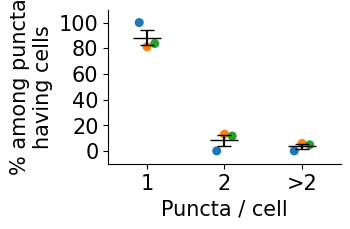

In [7]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
fontsize = 15

fig, ax = plt.subplots(figsize = (3, 2), dpi=100)
for idx, column in enumerate(df_number.columns):
    y = df_number[column].values
    x = [idx + 0.1*x for x in range(-1, 2)]
    ax.scatter(x, y, s=30, c=colors)

ax.errorbar(x=list(range(len(df_number))), y=SE_mean[0], yerr=SE_sem,
            capsize=5, fmt='_', ecolor='k', ms=20, mfc='None', mec='k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlim(-0.5, 2.5)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["1", "2", ">2"], fontsize=fontsize)
ax.set_xlabel("Puncta / cell", fontsize=fontsize)

ax.set_ylim(-10, 110)
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_yticklabels(["0", "20", "40", "60", "80", "100"], fontsize=fontsize)
ax.set_ylabel("% among puncta\nhaving cells", fontsize=fontsize)

fig.savefig("output.jpg", bbox_inches="tight")
plt.show()